---
سلام من مجتبی منصوری نژاد هستم 
---
---

---
در این بخش کتابخونه هایی که نیازه رو ایمپورت کردیم
---
---

In [1]:
import numpy as np
from scipy.signal import firwin
from numpy.fft import fft
import matplotlib.pyplot as plt


---
برای اینکه کد فلکس تر باشه اولش تمام پارامتر هارو تعریف میکنیم که بعد بتونیم تغییر بدیم
---
---

In [2]:
order = 50
M_values = [2, 3, 5, 10]
fc = 0.4
N_fft = 1024
h0 = firwin(order + 1, fc, window='hamming', pass_zero='lowpass')
n_original = np.arange(0, order + 1)
H_orig = fft(h0, N_fft)
freq_axis = np.arange(0, N_fft) / N_fft


---
اینجا حلقه اصلی کده بخاطر همین داخل خود کد بیشتر توضیح میدیم
---
---


=== M = 2 ===
Frequency Reconstruction Error - Type 1: 5.69e-16
Frequency Reconstruction Error - Type 2: 5.69e-16


/tmp/ipykernel_13/1236875026.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', M)
/tmp/ipykernel_13/1236875026.py:34: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax1.stem(n_original, h0, basefmt=" ", use_line_collection=True)
/tmp/ipykernel_13/1236875026.py:42: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax2.stem(n_comp, E1[k], linefmt='-', markerfmt='o', basefm

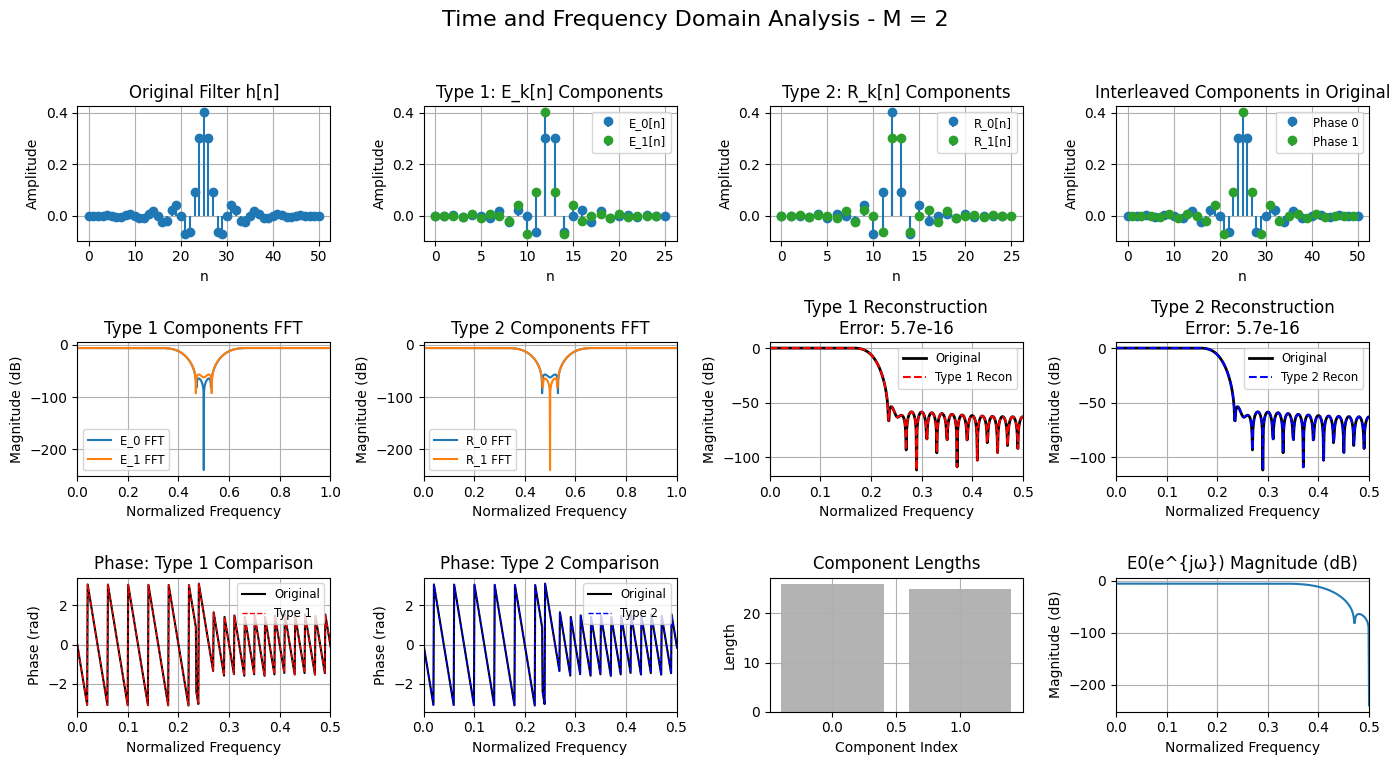


=== M = 3 ===
Frequency Reconstruction Error - Type 1: 8.46e-16
Frequency Reconstruction Error - Type 2: 8.46e-16


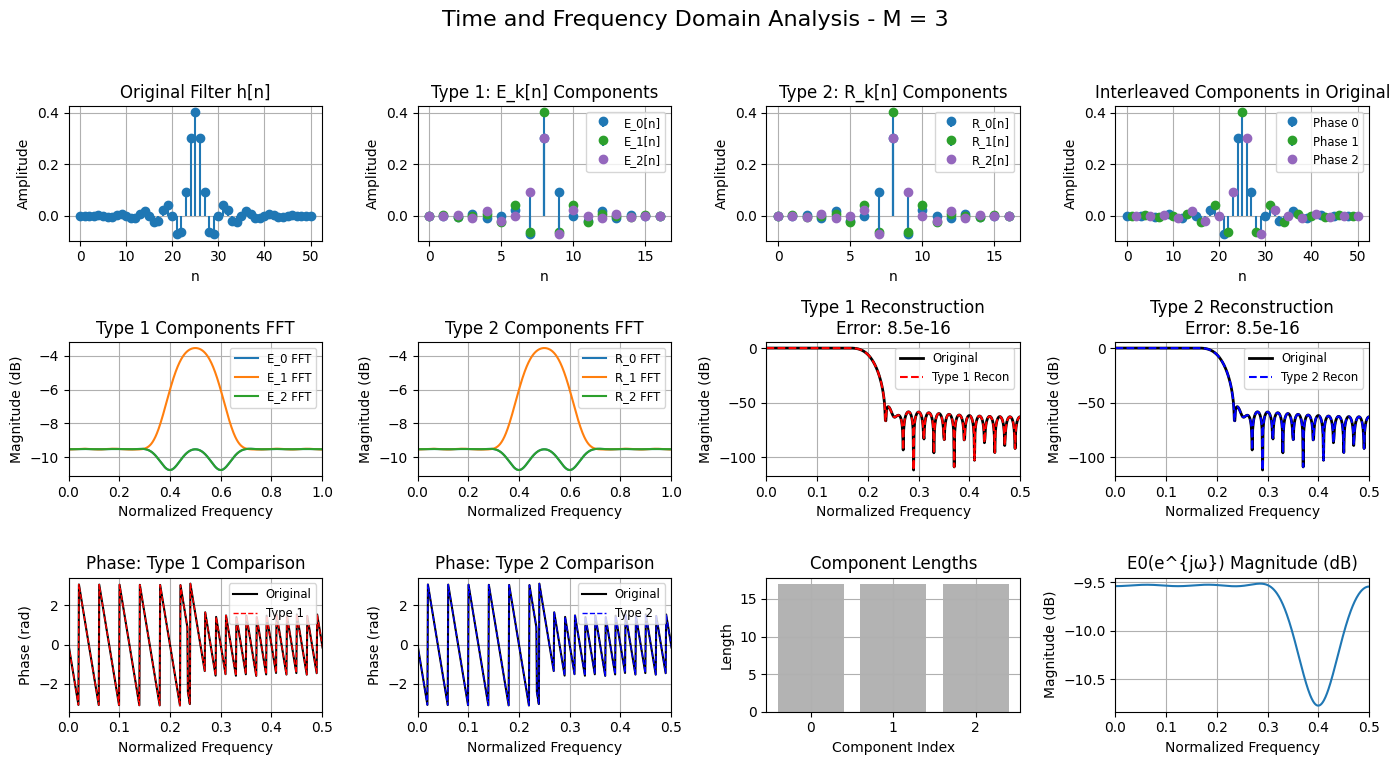


=== M = 5 ===
Frequency Reconstruction Error - Type 1: 1.34e-15
Frequency Reconstruction Error - Type 2: 1.37e-15


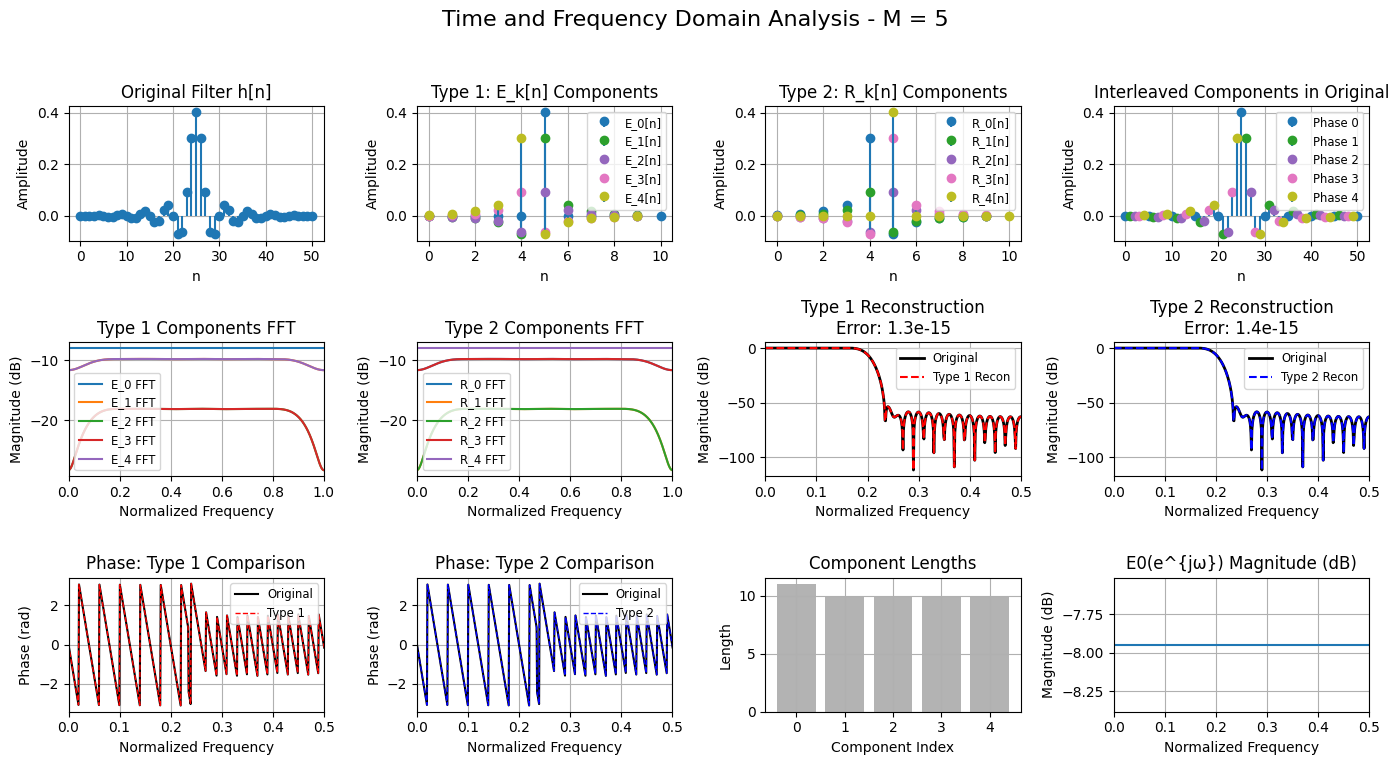


=== M = 10 ===
Frequency Reconstruction Error - Type 1: 4.08e-15
Frequency Reconstruction Error - Type 2: 4.09e-15


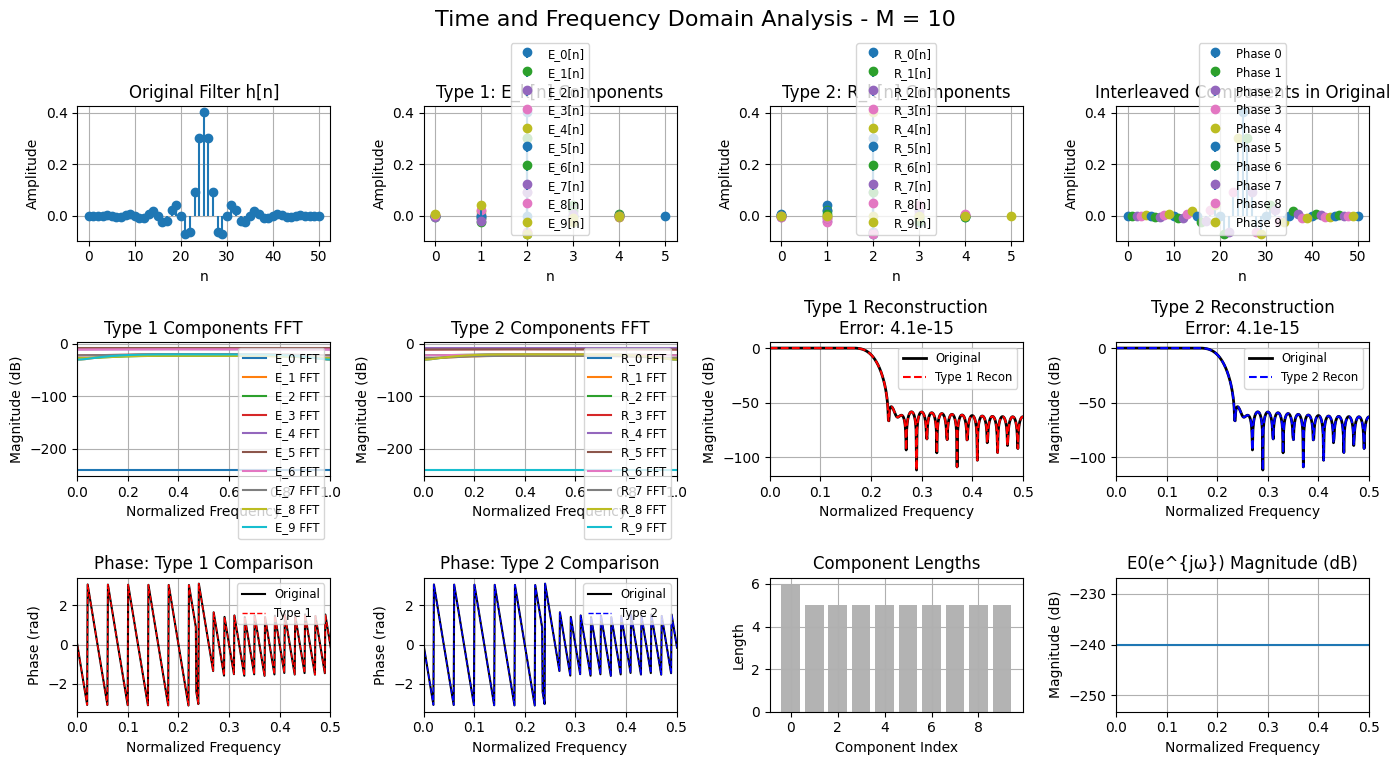

/tmp/ipykernel_13/1236875026.py:144: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', max(M_values))
/tmp/ipykernel_13/1236875026.py:150: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(indices, h0[indices], linefmt='-', markerfmt='o', basefmt=" ", label=f'Phase {k}', use_line_collection=True)
/tmp/ipykernel_13/1236875026.py:151: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positi

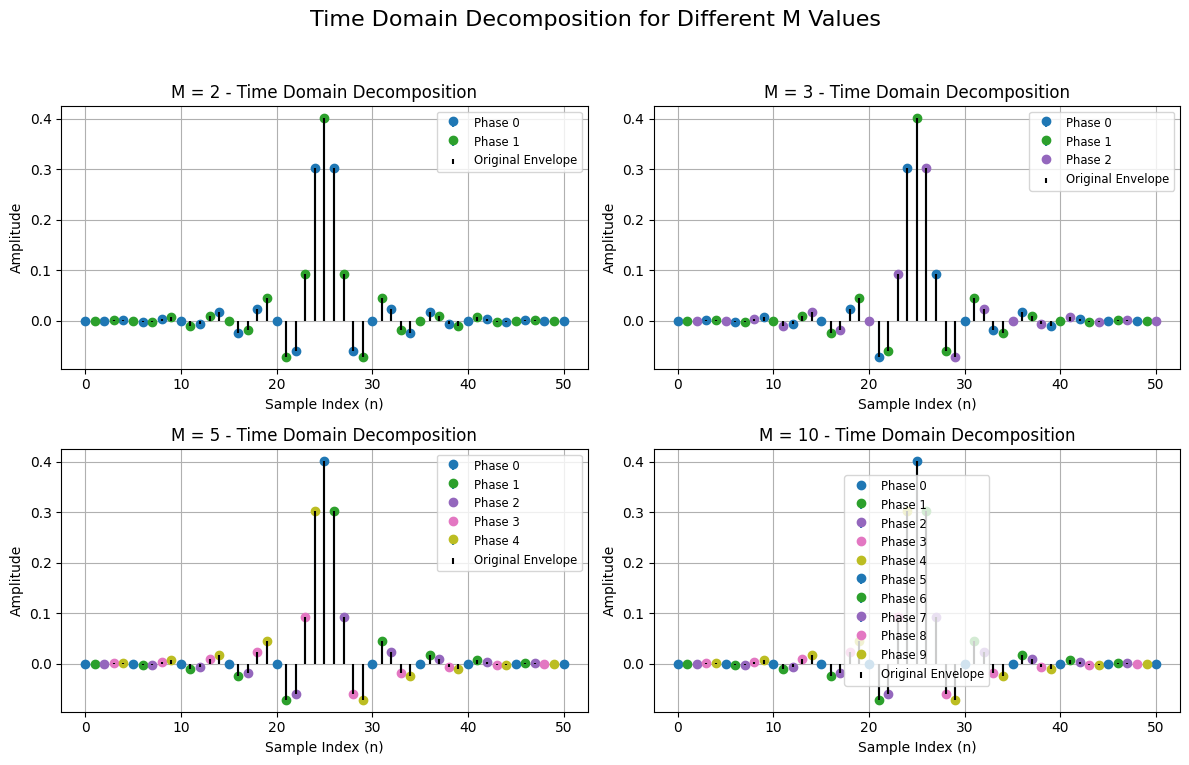


=== Analysis Complete ===


In [3]:

#M_values = [2, 3, 5, 10]
#به ازای مقادیر بالا قراره پیاده سازی کنیم پس یه حلقه میزنیم که برای هرکدوم از مقادیر بالا این کارو انجام بده

for M in M_values:
    print(f"\n=== M = {M} ===")
    E1 = [h0[k::M] for k in range(M)]
    R2 = [h0[(M-1-k)::M] for k in range(M)]
    E1_fft = [fft(e, N_fft) for e in E1]
    R2_fft = [fft(r, N_fft) for r in R2]
    # بالا اومد جز جز کردم که این جز جز با گام های M اتفاق افتاده است
    H_recon_type1 = np.zeros(N_fft, dtype=complex)
    H_recon_type2 = np.zeros(N_fft, dtype=complex)
    # بعد از بازسازی نیازه بریزم داخل یه ماتریکسی که از الان ساختمشون
    n = np.arange(N_fft)
    omega_phase = np.exp(-1j * 2 * np.pi * n / N_fft)
    for k in range(M):
        idx = (M * n) % N_fft
        Ek_at_Mw = E1_fft[k][idx]
        phase1 = np.exp(-1j * 2 * np.pi * n * k / N_fft)
        H_recon_type1 += phase1 * Ek_at_Mw
        Rk_at_Mw = R2_fft[k][idx]
        phase2 = np.exp(-1j * 2 * np.pi * n * (M - 1 - k) / N_fft)
        H_recon_type2 += phase2 * Rk_at_Mw
        #در این حلقه باز سازی رو انجام میدیم و داخلشون میریزیم
    error_type1 = np.max(np.abs(H_orig - H_recon_type1))
    error_type2 = np.max(np.abs(H_orig - H_recon_type2))
    # خطا رو گفته بودید حساب کنیم و بیاریم تو نمودارمون
    print(f"Frequency Reconstruction Error - Type 1: {error_type1:.2e}")
    print(f"Frequency Reconstruction Error - Type 2: {error_type2:.2e}")
    fig = plt.figure(figsize=(14, 8))
    fig.suptitle(f"Time and Frequency Domain Analysis - M = {M}", fontsize=16)
    colors = plt.cm.get_cmap('tab10', M)
    ax1 = fig.add_subplot(3, 4, 1)
    ax1.stem(n_original, h0, basefmt=" ", use_line_collection=True)
    ax1.set_title("Original Filter h[n]")
    ax1.set_xlabel("n")
    ax1.set_ylabel("Amplitude")
    ax1.grid(True)
    ax2 = fig.add_subplot(3, 4, 2)
    for k in range(M):
        n_comp = np.arange(0, len(E1[k]))
        ax2.stem(n_comp, E1[k], linefmt='-', markerfmt='o', basefmt=" ", label=f"E_{k}[n]", use_line_collection=True)
    ax2.set_title("Type 1: E_k[n] Components")
    ax2.set_xlabel("n")
    ax2.set_ylabel("Amplitude")
    ax2.legend(loc='best', fontsize='small')
    ax2.grid(True)
    ax3 = fig.add_subplot(3, 4, 3)
    for k in range(M):
        n_comp = np.arange(0, len(R2[k]))
        ax3.stem(n_comp, R2[k], linefmt='-', markerfmt='o', basefmt=" ", label=f"R_{k}[n]", use_line_collection=True)
    ax3.set_title("Type 2: R_k[n] Components")
    ax3.set_xlabel("n")
    ax3.set_ylabel("Amplitude")
    ax3.legend(loc='best', fontsize='small')
    ax3.grid(True)
    ax4 = fig.add_subplot(3, 4, 4)
    for k in range(M):
        indices = np.arange(k, order + 1, M)
        ax4.stem(indices, h0[indices], linefmt='-', markerfmt='o', basefmt=" ", label=f"Phase {k}", use_line_collection=True)
    ax4.set_title("Interleaved Components in Original")
    ax4.set_xlabel("n")
    ax4.set_ylabel("Amplitude")
    ax4.legend(loc='best', fontsize='small')
    ax4.grid(True)
    ax5 = fig.add_subplot(3, 4, 5)
    for k in range(M):
        mag = 20 * np.log10(np.maximum(np.abs(E1_fft[k]), 1e-12))
        ax5.plot(freq_axis, mag, label=f"E_{k} FFT")
    ax5.set_title("Type 1 Components FFT")
    ax5.set_xlabel("Normalized Frequency")
    ax5.set_ylabel("Magnitude (dB)")
    ax5.legend(loc='best', fontsize='small')
    ax5.grid(True)
    ax5.set_xlim(0, 1)
    ax6 = fig.add_subplot(3, 4, 6)
    for k in range(M):
        mag = 20 * np.log10(np.maximum(np.abs(R2_fft[k]), 1e-12))
        ax6.plot(freq_axis, mag, label=f"R_{k} FFT")
    ax6.set_title("Type 2 Components FFT")
    ax6.set_xlabel("Normalized Frequency")
    ax6.set_ylabel("Magnitude (dB)")
    ax6.legend(loc='best', fontsize='small')
    ax6.grid(True)
    ax6.set_xlim(0, 1)
    ax7 = fig.add_subplot(3, 4, 7)
    ax7.plot(freq_axis, 20 * np.log10(np.maximum(np.abs(H_orig), 1e-12)), 'k', linewidth=2, label='Original')
    ax7.plot(freq_axis, 20 * np.log10(np.maximum(np.abs(H_recon_type1), 1e-12)), 'r--', linewidth=1.5, label='Type 1 Recon')
    ax7.set_title(f"Type 1 Reconstruction\nError: {error_type1:.1e}")
    ax7.set_xlabel("Normalized Frequency")
    ax7.set_ylabel("Magnitude (dB)")
    ax7.legend(loc='best', fontsize='small')
    ax7.grid(True)
    ax7.set_xlim(0, 0.5)
    ax8 = fig.add_subplot(3, 4, 8)
    ax8.plot(freq_axis, 20 * np.log10(np.maximum(np.abs(H_orig), 1e-12)), 'k', linewidth=2, label='Original')
    ax8.plot(freq_axis, 20 * np.log10(np.maximum(np.abs(H_recon_type2), 1e-12)), 'b--', linewidth=1.5, label='Type 2 Recon')
    ax8.set_title(f"Type 2 Reconstruction\nError: {error_type2:.1e}")
    ax8.set_xlabel("Normalized Frequency")
    ax8.set_ylabel("Magnitude (dB)")
    ax8.legend(loc='best', fontsize='small')
    ax8.grid(True)
    ax8.set_xlim(0, 0.5)
    ax9 = fig.add_subplot(3, 4, 9)
    phase_orig = np.angle(H_orig)
    phase_type1 = np.angle(H_recon_type1)
    ax9.plot(freq_axis, phase_orig, 'k', linewidth=1.5, label='Original')
    ax9.plot(freq_axis, phase_type1, 'r--', linewidth=1.0, label='Type 1')
    ax9.set_title("Phase: Type 1 Comparison")
    ax9.set_xlabel("Normalized Frequency")
    ax9.set_ylabel("Phase (rad)")
    ax9.legend(loc='best', fontsize='small')
    ax9.grid(True)
    ax9.set_xlim(0, 0.5)
    ax10 = fig.add_subplot(3, 4, 10)
    phase_type2 = np.angle(H_recon_type2)
    ax10.plot(freq_axis, phase_orig, 'k', linewidth=1.5, label='Original')
    ax10.plot(freq_axis, phase_type2, 'b--', linewidth=1.0, label='Type 2')
    ax10.set_title("Phase: Type 2 Comparison")
    ax10.set_xlabel("Normalized Frequency")
    ax10.set_ylabel("Phase (rad)")
    ax10.legend(loc='best', fontsize='small')
    ax10.grid(True)
    ax10.set_xlim(0, 0.5)
    ax11 = fig.add_subplot(3, 4, 11)
    comp_lengths = [len(e) for e in E1]
    ax11.bar(np.arange(0, M), comp_lengths, color=[0.7, 0.7, 0.7])
    ax11.set_title("Component Lengths")
    ax11.set_xlabel("Component Index")
    ax11.set_ylabel("Length")
    ax11.grid(True)
    ax12 = fig.add_subplot(3, 4, 12)
    E0_mag = 20 * np.log10(np.maximum(np.abs(E1_fft[0]), 1e-12))
    ax12.plot(freq_axis, E0_mag, linewidth=1.5)
    ax12.set_title("E0(e^{jω}) Magnitude (dB)")
    ax12.set_xlabel("Normalized Frequency")
    ax12.set_ylabel("Magnitude (dB)")
    ax12.grid(True)
    ax12.set_xlim(0, 0.5)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Time Domain Decomposition for Different M Values', fontsize=16)
colors = plt.cm.get_cmap('tab10', max(M_values))
for i, M in enumerate(M_values):
    E1 = [h0[k::M] for k in range(M)]
    ax = fig.add_subplot(2, 2, i + 1)
    for k in range(M):
        indices = np.arange(k, order + 1, M)
        ax.stem(indices, h0[indices], linefmt='-', markerfmt='o', basefmt=" ", label=f'Phase {k}', use_line_collection=True)
    ax.stem(n_original, h0, linefmt='k-', markerfmt='None', basefmt=" ", label='Original Envelope', use_line_collection=True)
    ax.set_title(f'M = {M} - Time Domain Decomposition')
    ax.set_xlabel('Sample Index (n)')
    ax.set_ylabel('Amplitude')
    ax.legend(loc='best', fontsize='small')
    ax.grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("\n=== Analysis Complete ===")
